# Dimensionality Reduction using PCA on multivariate timeseries data
Written by @ansjin (Anshul Jindal) [anshul.jindal@tum.de]

## Step1 : Import the required libraries

In [1]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

## Step2 : Read the dataset

In [2]:
df = pd.read_excel('m_1.xlsx', index_col = 0)
df.drop('machine_id', axis=1, inplace=True)
df = df.fillna(0)
df.head()

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
timestamp,,,,,,,
2011-05-01 12:00:10,13,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:20,10,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:30,11,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:40,12,84,0.0,0.0,32.46,23.09,1
2011-05-01 12:00:50,12,84,0.0,0.0,32.46,23.09,1


In [3]:
df.shape

(46368, 7)

## Step3 : Standardizing the data

In [4]:
X = df.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Step4 : Apply PCA

In [5]:
pca = PCA()
X_pca = pca.fit(X_std)

## Step5 : Determine the number of components

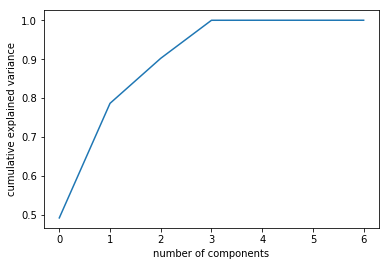

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Step6 : Dimensionality Reduction

In [7]:
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Step4-6 together (optional) : Dimensionality Reduction

In [8]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

4


## Step7 : Finding the most important features set

In [9]:
pd.DataFrame(pca.components_, columns = df.columns)

,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
0,-0.118573,-0.478128,-1.110223e-16,-0.000000e+00,-0.607107,-0.606225,-0.145762
1,0.699157,-0.013101,0.000000e+00,0.000000e+00,-0.143500,-0.147322,0.684626
2,-0.203818,-0.818723,6.245005e-17,-1.110223e-16,0.302247,0.305581,0.321585
3,-0.674959,0.317664,-2.775558e-17,0.000000e+00,-0.136464,-0.135183,0.637670


In [10]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [11]:
most_important_names

['net_in', 'cpu_util_percent', 'mem_util_percent', 'cpu_util_percent']